In [216]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

In [217]:
def child_attrs(children, i):
    d = {'arrowhead': 'none', 'labeljust':'l'}
    if len(children) > 1:
        d['headlabel'] = str(i + 1)
    return d

def make_graph(d):
    r2i = {}
    graph = nx.DiGraph()
    e_attr = {'shape':'point', 'label':''}
    for parent, rules in d.iteritems():
        graph.add_node(parent)
        for children in rules:
            e = r2i.get((parent, tuple(rules)), None)
            if e is None:
                e = 'e%d' % (len(r2i) + 1)
                r2i[(parent, children)] = e
                graph.add_node(e, attr_dict={'shape':'point'})
                graph.add_edge(parent, e, attr_dict={'arrowhead':'none'})
                
            for i, child in enumerate(children):
                graph.add_node(child)
                graph.add_edge(e, child, attr_dict=child_attrs(children, i))
    return graph

In [218]:
d = {('X05'):[('switch', 'please-X15-light', 'off'), ('switch', 'the-X15-light', 'off')], 
     ('please-X15-light'):[('please','X13',)],
     ('the-X15-light'):[('X12','X25',)],
     ('X13'):[('X12',), ('X23',)], 
     ('X12'):[('the',)],
     ('X23'):[('light',)],
     ('X25'):[('please', 'X23')]}

In [219]:
G = make_graph(d)

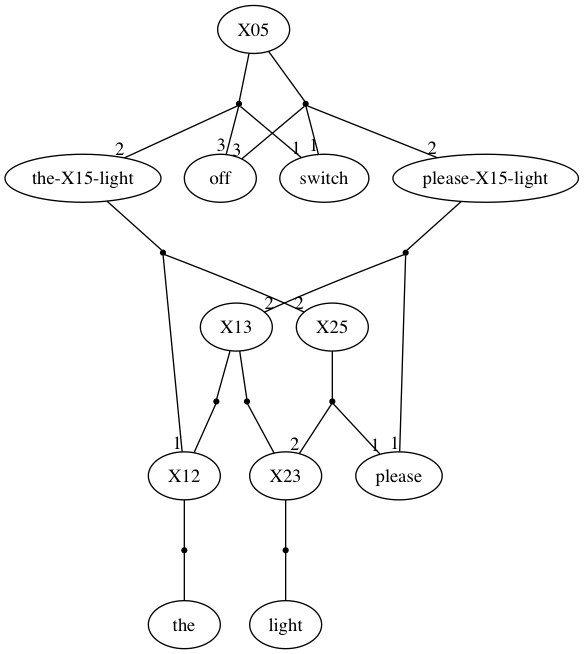

In [220]:
draw(G)